In [1]:
import pandas as pd
import numpy as np
import yfinance as yfin
import certifi
import json
import ssl
import requests
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

In [2]:

def get_transcript(ticker, year, quarter):
    key = '22579006dc377a880ec7abbba96fbdd2'
    transcript = requests.get(
        f'https://financialmodelingprep.com/api/v3/earning_call_transcript/{ticker}?quarter={quarter}&year={year}&apikey={key}').json()
    if len(transcript) > 0:
        script = transcript[0]['content']
        ognoo = transcript[0]['date']
        ognoo_ = str(ognoo).split(' ')[0]
        return [ognoo_, script]
    else:
        return 'transcript is empty.'


In [3]:
test_firms = ['AAPL', 'AMZN']
test_years = [2019, 2020]
test_quarters = [1, 2]
get_transcript(test_firms[0], test_years[0], test_quarters[0]) 

['2019-01-30',
 "Operator: Good day and welcome to the Apple Incorporated First Quarter Fiscal Year 2019 Earnings Conference Call. Today's call is being recorded. At this time for opening remarks and introductions, I would like to turn the call over to Nancy Paxton, Senior Director of Investor Relations. Please, go ahead.\nNancy Paxton: Thank you. Good afternoon and thanks to everyone for joining us. Speaking first today is Apple CEO, Tim Cook, and he'll be followed by CFO, Luca Maestri. After that, we'll open the call to questions from analysts. Please note that some of the information you'll hear during our discussion today will consist of forward-looking statements, including without limitation those regarding revenue, gross margin, operating expenses, other income and expense, taxes, capital allocation, and future business outlook. Actual results or trends could differ materially from our forecast. For more information, please refer to the Risk Factors discussed in Apple's most rec

In [4]:
def get_all_transcripts(firm_list, year_list, quarter_list):
    main_list = list()
    for firm_ticker in firm_list:
        for each_year in year_list:
            for each_qtr in quarter_list:
                sub_list = list()
                sub_list.append(firm_ticker)
                try:

                    scrip, ognoo = get_transcript(firm_ticker, each_year, each_qtr)
                    sub_list.append(script)
                    sub_list.append(ognoo)
                except:
                    sub_list.append(np.nan)
                    sub_list.append(np.nan)
                main_list.append(sub_list)
    return pd.DataFrame(main_list, columns=['ticker', 'ognoo', 'transcript'])

In [5]:
def get_all_transcripts(firm_list, year_list, quarter_list):
    main_list = []
    for ticker in firm_list:
        for each_year in year_list:
            for each_qtr in quarter_list:
                sub_list = []
                sub_list.append(ticker)
                try:

                    trans, date = get_transcript(ticker, each_year, each_qtr)
                    sub_list.append(trans)
                    sub_list.append(date)
                except:
                    sub_list.append(np.nan)
                    sub_list.append(np.nan)
                main_list.append(sub_list)
    return pd.DataFrame(main_list, columns=['ticker', 'ognoo', 'transcript'])

In [6]:
get_all_transcripts(test_firms, test_years, test_quarters)

,ticker,ognoo,transcript
0,AAPL,2019-01-30,Operator: Good day and welcome to the Apple In...
1,AAPL,2019-04-30,"Operator: Good day, and welcome to the Apple I..."
2,AAPL,2020-01-29,"Operator: Good day, everyone. Welcome to the A..."
3,AAPL,2020-05-01,Operator: Good day everyone. Welcome to the Ap...
4,AMZN,2019-04-26,"Operator: Thank you for standing by. Good day,..."
5,AMZN,2019-07-25,"Operator: Thank you for standing by. Good day,..."
6,AMZN,2020-05-01,Operator: Good day everyone and welcome to the...
7,AMZN,2020-07-30,"Operator: Thank you for standing by. Good day,..."


In [7]:
def calcul_data(df):
    lists = list()
    df = df.dropna()

    for index, row in df.iterrows():
        ticker = row['ticker']
        odor = datetime.strptime(row['ognoo'], '%Y-%m-%d')
        days_later_90 = odor + timedelta(days=90)
        try:
            data = yfin.download(ticker, start=odor, end=days_later_90,
                                 interval='3mo')
            vgt = yfin.download('VGT', start=odor, end=days_later_90,
                                interval='3mo')

            adj = data['Adj Close'][0]
            adj_1 = data['Adj Close'][-1]
            sample_delta = adj_1 / adj - 1

            vgt_adj = vgt['Adj Close'][0]
            vgt_adj_1 = vgt['Adj Close'][-1]
            vgt_delta = vgt_adj_1 / vgt_adj - 1
            lists.append([sample_delta, vgt_delta])
        except:
            sample_delta = np.nan
            vgt_delta = np.nan
            lists.append([sample_delta, vgt_delta])
    df.loc[:, 'ticker_data'] = lists
    return df


In [8]:
test_firms = ['AAPL', 'AMZN']
test_years = [2017, 2018, 2019, 2020]
scripts = get_all_transcripts(test_firms, test_years, test_quarters)
scripts = calcul_data(scripts)
scripts

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ticker,ognoo,transcript,ticker_data
0,AAPL,2017-02-01,"Operator: Good day, everyone, and welcome to t...","[0.06802854908281541, 0.04691873304342464]"
1,AAPL,2017-05-03,"Operator: Good day, everyone, and welcome to t...","[nan, nan]"
2,AAPL,2018-02-02,Operator: Good day. And welcome to this Apple ...,"[0.1353738954427608, 0.0727026224846512]"
3,AAPL,2018-05-02,"Operator: Good day everyone, and welcome to th...","[nan, nan]"
4,AAPL,2019-01-30,Operator: Good day and welcome to the Apple In...,"[0.06096677676516471, 0.06689174876626347]"
5,AAPL,2019-04-30,"Operator: Good day, and welcome to the Apple I...","[0.08053974147300091, 0.03848202576683546]"
6,AAPL,2020-01-29,"Operator: Good day, everyone. Welcome to the A...","[0.15811577360396556, 0.14647817690227893]"
7,AAPL,2020-05-01,Operator: Good day everyone. Welcome to the Ap...,"[nan, nan]"
8,AMZN,2017-04-28,"Operator: Thank you for standing by. Good day,...","[0.020433850865833714, 0.04430641594665974]"
9,AMZN,2017-07-28,"Operator: Thank you for standing by. Good day,...","[0.1497165176249049, 0.07697222458780861]"


In [9]:
scripts.columns

Index(['ticker', 'ognoo', 'transcript', 'ticker_data'], dtype='object')

In [10]:
scripts.loc[:, 'vgt'] = scripts['ticker_data'].apply(lambda x: x[1])
scripts.loc[:, 'sample'] = scripts['ticker_data'].apply(lambda x: x[0])
scripts.dropna()

,ticker,ognoo,transcript,ticker_data,vgt,sample
0,AAPL,2017-02-01,"Operator: Good day, everyone, and welcome to t...","[0.06802854908281541, 0.04691873304342464]",0.046919,0.068029
2,AAPL,2018-02-02,Operator: Good day. And welcome to this Apple ...,"[0.1353738954427608, 0.0727026224846512]",0.072703,0.135374
4,AAPL,2019-01-30,Operator: Good day and welcome to the Apple In...,"[0.06096677676516471, 0.06689174876626347]",0.066892,0.060967
5,AAPL,2019-04-30,"Operator: Good day, and welcome to the Apple I...","[0.08053974147300091, 0.03848202576683546]",0.038482,0.080540
6,AAPL,2020-01-29,"Operator: Good day, everyone. Welcome to the A...","[0.15811577360396556, 0.14647817690227893]",0.146478,0.158116
8,AMZN,2017-04-28,"Operator: Thank you for standing by. Good day,...","[0.020433850865833714, 0.04430641594665974]",0.044306,0.020434
9,AMZN,2017-07-28,"Operator: Thank you for standing by. Good day,...","[0.1497165176249049, 0.07697222458780861]",0.076972,0.149717
10,AMZN,2018-04-27,"Operator: Thank you for standing by. Good day,...","[0.04567600755093726, 0.029034220000453415]",0.029034,0.045676
11,AMZN,2018-07-27,"Operator: Thank you for standing by. Good day,...","[-0.20219175018307878, -0.08180699662748558]",-0.081807,-0.202192
12,AMZN,2019-04-26,"Operator: Thank you for standing by. Good day,...","[-0.014179183493694736, 0.03848217790893638]",0.038482,-0.014179


In [11]:
New_tech = ['ACIW', 'ACLS', 'AGYS', 'AAPL', 'AMZN']

In [12]:
scripts = get_all_transcripts(New_tech, test_years, test_quarters)
scripts = calcul_data(scripts)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [13]:
scripts.loc[:, 'vgt'] = scripts['ticker_data'].apply(lambda x: x[1])
scripts.loc[:, 'sample'] = scripts['ticker_data'].apply(lambda x: x[0])
scripts.dropna()

,ticker,ognoo,transcript,ticker_data,vgt,sample
0,ACIW,2017-05-04,"Operator: Good morning. My name is Jacquelyn, ...","[-0.01769528899706807, 0.03404595083824313]",0.034046,-0.017695
1,ACIW,2017-07-27,"Operator: Good morning. My name is Hyde, and I...","[0.057067567948874354, 0.07697221645500552]",0.076972,0.057068
2,ACIW,2018-05-12,"Operator: Good day. My name is Elsa, and I wil...","[0.09945819193684602, 0.09235097029744344]",0.092351,0.099458
3,ACIW,2018-08-04,"Operator: Good day. My name is Karnesia, and I...","[0.15105615723911403, -0.011487060541160332]",-0.011487,0.151056
4,ACIW,2019-05-11,"Operator: Good morning, Ladies and gentlemen. ...","[-0.11263410405143337, -0.01900097588768801]",-0.019001,-0.112634
5,ACIW,2019-08-11,"Operator: Good morning. My name is Tom, and I ...","[0.19464800029166218, 0.06001230910173949]",0.060012,0.194648
6,ACIW,2020-05-08,"Operator: Ladies and gentlemen, thank you for ...","[0.09667779607047744, 0.1141144100953313]",0.114114,0.096678
7,ACIW,2020-08-09,"Operator: Ladies and gentlemen, thank you for ...","[0.11690098545909855, 0.12794193377271923]",0.127942,0.116901
8,ACLS,2017-05-08,"Operator: Good day, ladies and gentlemen, and ...","[-0.05855860809605884, 0.034046056912100164]",0.034046,-0.058559
9,ACLS,2017-08-05,"Operator: Good day, ladies and gentlemen, and ...","[-0.027355668210865325, 0.013747387801518851]",0.013747,-0.027356


In [14]:

def better_than_vgt(scripts, col1, col2):
    ref = list()
    for index, row in scripts.iterrows():
        if row[col1] < row[col2]:
            ref.append(int(1))
        else:
            ref.append(int(0))
    scripts.loc[:, 'better_than_vgt'] = ref
    return scripts

In [16]:
scripts = better_than_vgt(scripts, 'vgt', 'sample')
scripts

,ticker,ognoo,transcript,ticker_data,vgt,sample,better_than_vgt
0,ACIW,2017-05-04,"Operator: Good morning. My name is Jacquelyn, ...","[-0.01769528899706807, 0.03404595083824313]",0.034046,-0.017695,0
1,ACIW,2017-07-27,"Operator: Good morning. My name is Hyde, and I...","[0.057067567948874354, 0.07697221645500552]",0.076972,0.057068,0
2,ACIW,2018-05-12,"Operator: Good day. My name is Elsa, and I wil...","[0.09945819193684602, 0.09235097029744344]",0.092351,0.099458,1
3,ACIW,2018-08-04,"Operator: Good day. My name is Karnesia, and I...","[0.15105615723911403, -0.011487060541160332]",-0.011487,0.151056,1
4,ACIW,2019-05-11,"Operator: Good morning, Ladies and gentlemen. ...","[-0.11263410405143337, -0.01900097588768801]",-0.019001,-0.112634,0
5,ACIW,2019-08-11,"Operator: Good morning. My name is Tom, and I ...","[0.19464800029166218, 0.06001230910173949]",0.060012,0.194648,1
6,ACIW,2020-05-08,"Operator: Ladies and gentlemen, thank you for ...","[0.09667779607047744, 0.1141144100953313]",0.114114,0.096678,0
7,ACIW,2020-08-09,"Operator: Ladies and gentlemen, thank you for ...","[0.11690098545909855, 0.12794193377271923]",0.127942,0.116901,0
8,ACLS,2017-05-08,"Operator: Good day, ladies and gentlemen, and ...","[-0.05855860809605884, 0.034046056912100164]",0.034046,-0.058559,0
9,ACLS,2017-08-05,"Operator: Good day, ladies and gentlemen, and ...","[-0.027355668210865325, 0.013747387801518851]",0.013747,-0.027356,0


In [18]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [19]:
import requests
import matplotlib.pyplot as plt

import textstat
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score, precision_score,log_loss, make_scorer, roc_curve, plot_roc_curve, precision_score, auc
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

Gunning Fog index: readability of the text. It generates a grade level between 0 and 20. It also estimates the education level required to understand the text.

In [20]:
scripts.loc[:, 'GunningFog'] = scripts.loc[:, 'transcript'].apply(textstat.gunning_fog)
scripts

,ticker,ognoo,transcript,ticker_data,vgt,sample,better_than_vgt,GunningFog
0,ACIW,2017-05-04,"Operator: Good morning. My name is Jacquelyn, ...","[-0.01769528899706807, 0.03404595083824313]",0.034046,-0.017695,0,9.47
1,ACIW,2017-07-27,"Operator: Good morning. My name is Hyde, and I...","[0.057067567948874354, 0.07697221645500552]",0.076972,0.057068,0,11.41
2,ACIW,2018-05-12,"Operator: Good day. My name is Elsa, and I wil...","[0.09945819193684602, 0.09235097029744344]",0.092351,0.099458,1,9.11
3,ACIW,2018-08-04,"Operator: Good day. My name is Karnesia, and I...","[0.15105615723911403, -0.011487060541160332]",-0.011487,0.151056,1,8.97
4,ACIW,2019-05-11,"Operator: Good morning, Ladies and gentlemen. ...","[-0.11263410405143337, -0.01900097588768801]",-0.019001,-0.112634,0,9.32
5,ACIW,2019-08-11,"Operator: Good morning. My name is Tom, and I ...","[0.19464800029166218, 0.06001230910173949]",0.060012,0.194648,1,9.30
6,ACIW,2020-05-08,"Operator: Ladies and gentlemen, thank you for ...","[0.09667779607047744, 0.1141144100953313]",0.114114,0.096678,0,9.77
7,ACIW,2020-08-09,"Operator: Ladies and gentlemen, thank you for ...","[0.11690098545909855, 0.12794193377271923]",0.127942,0.116901,0,8.91
8,ACLS,2017-05-08,"Operator: Good day, ladies and gentlemen, and ...","[-0.05855860809605884, 0.034046056912100164]",0.034046,-0.058559,0,7.15
9,ACLS,2017-08-05,"Operator: Good day, ladies and gentlemen, and ...","[-0.027355668210865325, 0.013747387801518851]",0.013747,-0.027356,0,7.92


Gives a text score between 1 and 100, with 100 being the highest readability score. Scoring between 70 and 80 is equavalent to school grade level 8. 

In [21]:
scripts.loc[:, 'FleschKincaidGrade'] = scripts.loc[:, 'transcript'].apply(textstat.flesch_reading_ease)
scripts

,ticker,ognoo,transcript,ticker_data,vgt,sample,better_than_vgt,GunningFog,FleschKincaidGrade
0,ACIW,2017-05-04,"Operator: Good morning. My name is Jacquelyn, ...","[-0.01769528899706807, 0.03404595083824313]",0.034046,-0.017695,0,9.47,69.31
1,ACIW,2017-07-27,"Operator: Good morning. My name is Hyde, and I...","[0.057067567948874354, 0.07697221645500552]",0.076972,0.057068,0,11.41,64.54
2,ACIW,2018-05-12,"Operator: Good day. My name is Elsa, and I wil...","[0.09945819193684602, 0.09235097029744344]",0.092351,0.099458,1,9.11,70.33
3,ACIW,2018-08-04,"Operator: Good day. My name is Karnesia, and I...","[0.15105615723911403, -0.011487060541160332]",-0.011487,0.151056,1,8.97,70.84
4,ACIW,2019-05-11,"Operator: Good morning, Ladies and gentlemen. ...","[-0.11263410405143337, -0.01900097588768801]",-0.019001,-0.112634,0,9.32,62.07
5,ACIW,2019-08-11,"Operator: Good morning. My name is Tom, and I ...","[0.19464800029166218, 0.06001230910173949]",0.060012,0.194648,1,9.30,61.87
6,ACIW,2020-05-08,"Operator: Ladies and gentlemen, thank you for ...","[0.09667779607047744, 0.1141144100953313]",0.114114,0.096678,0,9.77,61.56
7,ACIW,2020-08-09,"Operator: Ladies and gentlemen, thank you for ...","[0.11690098545909855, 0.12794193377271923]",0.127942,0.116901,0,8.91,62.78
8,ACLS,2017-05-08,"Operator: Good day, ladies and gentlemen, and ...","[-0.05855860809605884, 0.034046056912100164]",0.034046,-0.058559,0,7.15,73.88
9,ACLS,2017-08-05,"Operator: Good day, ladies and gentlemen, and ...","[-0.027355668210865325, 0.013747387801518851]",0.013747,-0.027356,0,7.92,65.01


Lexicon and Smog test. Lexicon refers to the vocabulary or collection of words by a person, group, language, ir field. On the other hand, SMOG is a readability framework that measures how many years of education the average person needs to have to understand the text.

In [22]:
scripts.loc[:, 'LexiconCount'] = scripts.loc[:, 'transcript'].apply(textstat.lexicon_count)
scripts.loc[:, 'SmogIndex'] = scripts.loc[:, 'transcript'].apply(textstat.smog_index)
scripts

,ticker,ognoo,transcript,ticker_data,vgt,sample,better_than_vgt,GunningFog,FleschKincaidGrade,LexiconCount,SmogIndex
0,ACIW,2017-05-04,"Operator: Good morning. My name is Jacquelyn, ...","[-0.01769528899706807, 0.03404595083824313]",0.034046,-0.017695,0,9.47,69.31,3880,10.6
1,ACIW,2017-07-27,"Operator: Good morning. My name is Hyde, and I...","[0.057067567948874354, 0.07697221645500552]",0.076972,0.057068,0,11.41,64.54,3972,11.7
2,ACIW,2018-05-12,"Operator: Good day. My name is Elsa, and I wil...","[0.09945819193684602, 0.09235097029744344]",0.092351,0.099458,1,9.11,70.33,4913,11.0
3,ACIW,2018-08-04,"Operator: Good day. My name is Karnesia, and I...","[0.15105615723911403, -0.011487060541160332]",-0.011487,0.151056,1,8.97,70.84,4961,10.9
4,ACIW,2019-05-11,"Operator: Good morning, Ladies and gentlemen. ...","[-0.11263410405143337, -0.01900097588768801]",-0.019001,-0.112634,0,9.32,62.07,4641,11.4
5,ACIW,2019-08-11,"Operator: Good morning. My name is Tom, and I ...","[0.19464800029166218, 0.06001230910173949]",0.060012,0.194648,1,9.30,61.87,5497,11.4
6,ACIW,2020-05-08,"Operator: Ladies and gentlemen, thank you for ...","[0.09667779607047744, 0.1141144100953313]",0.114114,0.096678,0,9.77,61.56,2641,11.6
7,ACIW,2020-08-09,"Operator: Ladies and gentlemen, thank you for ...","[0.11690098545909855, 0.12794193377271923]",0.127942,0.116901,0,8.91,62.78,5498,11.2
8,ACLS,2017-05-08,"Operator: Good day, ladies and gentlemen, and ...","[-0.05855860809605884, 0.034046056912100164]",0.034046,-0.058559,0,7.15,73.88,7156,9.8
9,ACLS,2017-08-05,"Operator: Good day, ladies and gentlemen, and ...","[-0.027355668210865325, 0.013747387801518851]",0.013747,-0.027356,0,7.92,65.01,4724,10.6


In [23]:
data_lr = scripts.loc[:, ['better_than_vgt', 'GunningFog', 'FleschKincaidGrade', 'LexiconCount', 'SmogIndex']]
data_lr

,better_than_vgt,GunningFog,FleschKincaidGrade,LexiconCount,SmogIndex
0,0,9.47,69.31,3880,10.6
1,0,11.41,64.54,3972,11.7
2,1,9.11,70.33,4913,11.0
3,1,8.97,70.84,4961,10.9
4,0,9.32,62.07,4641,11.4
5,1,9.30,61.87,5497,11.4
6,0,9.77,61.56,2641,11.6
7,0,8.91,62.78,5498,11.2
8,0,7.15,73.88,7156,9.8
9,0,7.92,65.01,4724,10.6


array([[<AxesSubplot:xlabel='better_than_vgt', ylabel='better_than_vgt'>,
        <AxesSubplot:xlabel='GunningFog', ylabel='better_than_vgt'>,
        <AxesSubplot:xlabel='FleschKincaidGrade', ylabel='better_than_vgt'>,
        <AxesSubplot:xlabel='LexiconCount', ylabel='better_than_vgt'>,
        <AxesSubplot:xlabel='SmogIndex', ylabel='better_than_vgt'>],
       [<AxesSubplot:xlabel='better_than_vgt', ylabel='GunningFog'>,
        <AxesSubplot:xlabel='GunningFog', ylabel='GunningFog'>,
        <AxesSubplot:xlabel='FleschKincaidGrade', ylabel='GunningFog'>,
        <AxesSubplot:xlabel='LexiconCount', ylabel='GunningFog'>,
        <AxesSubplot:xlabel='SmogIndex', ylabel='GunningFog'>],
       [<AxesSubplot:xlabel='better_than_vgt', ylabel='FleschKincaidGrade'>,
        <AxesSubplot:xlabel='GunningFog', ylabel='FleschKincaidGrade'>,
        <AxesSubplot:xlabel='FleschKincaidGrade', ylabel='FleschKincaidGrade'>,
        <AxesSubplot:xlabel='LexiconCount', ylabel='FleschKincaidGrade'>,
  

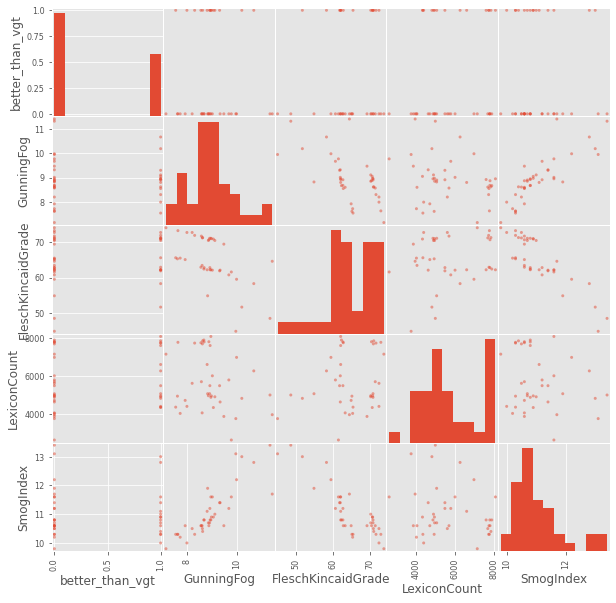

In [24]:
pd.plotting.scatter_matrix(data_lr, figsize=(10, 10))

In [25]:
y = data_lr.pop('better_than_vgt')
X = data_lr
X

,GunningFog,FleschKincaidGrade,LexiconCount,SmogIndex
0,9.47,69.31,3880,10.6
1,11.41,64.54,3972,11.7
2,9.11,70.33,4913,11.0
3,8.97,70.84,4961,10.9
4,9.32,62.07,4641,11.4
5,9.30,61.87,5497,11.4
6,9.77,61.56,2641,11.6
7,8.91,62.78,5498,11.2
8,7.15,73.88,7156,9.8
9,7.92,65.01,4724,10.6


In [28]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jrbat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

print(sw)
print('---------------------end---------------')
print('\ntotal words: ', len(sw))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
vocab = ['yeah', 'year','years', 'yes','youre', 'would', 'say', 'like', 'com','come','comes',
        'hi', 'id','ill','im']
for word in sw:
    vocab.append(word)


In [31]:
tfidf = TfidfVectorizer(strip_accents='ascii', lowercase = True, analyzer='word',
                        stop_words= vocab, ngram_range = (1,2), max_features = 1000, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

document_tfidf_matrix = tfidf.fit_transform(scripts.transcript)

tfidf_df = pd.DataFrame(document_tfidf_matrix.toarray(), columns=tfidf.get_feature_names())
tfidf_df

,ability,able,accelerate,accounting,accounts,achieve,aci,acquisition,across,active,...,whole foods,wins,within,wondering,work,working,world,worldwide,x,yet
0,0.025949,0.000000,0.009615,0.000000,0.009114,0.019763,0.078782,0.000000,0.006737,0.000000,...,0.000000,0.000000,0.014505,0.000000,0.006575,0.006904,0.031308,0.011416,0.000000,0.009881
1,0.030538,0.008535,0.000000,0.000000,0.000000,0.011629,0.074172,0.016423,0.007929,0.000000,...,0.000000,0.000000,0.008535,0.000000,0.015475,0.016251,0.066321,0.013435,0.000000,0.000000
2,0.029982,0.025138,0.000000,0.042128,0.000000,0.017126,0.259424,0.000000,0.035030,0.000000,...,0.000000,0.022513,0.025138,0.000000,0.005697,0.005983,0.021704,0.019786,0.000000,0.008563
3,0.000000,0.036205,0.000000,0.060674,0.000000,0.019732,0.094391,0.013933,0.040362,0.000000,...,0.000000,0.051878,0.021723,0.000000,0.013129,0.006894,0.018756,0.011398,0.000000,0.009866
4,0.021137,0.017723,0.015664,0.000000,0.014847,0.000000,0.282361,0.215978,0.027440,0.000000,...,0.000000,0.063486,0.017723,0.000000,0.010711,0.011248,0.005100,0.009299,0.000000,0.000000
5,0.011452,0.019204,0.019094,0.000000,0.012066,0.006541,0.438078,0.055428,0.026760,0.000000,...,0.000000,0.034396,0.019204,0.012391,0.004352,0.018282,0.020725,0.007557,0.000000,0.000000
6,0.000000,0.021830,0.014471,0.000000,0.000000,0.000000,0.213423,0.021003,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014086,0.000000,0.000000,0.018848,0.017182,0.000000,0.000000
7,0.000000,0.011820,0.007835,0.000000,0.000000,0.000000,0.179760,0.000000,0.016471,0.000000,...,0.000000,0.000000,0.000000,0.007627,0.037505,0.022506,0.020411,0.000000,0.000000,0.008052
8,0.000000,0.011304,0.000000,0.012629,0.018940,0.005134,0.000000,0.000000,0.021003,0.000000,...,0.000000,0.000000,0.007536,0.000000,0.000000,0.007175,0.009760,0.000000,0.000000,0.015402
9,0.006380,0.000000,0.000000,0.026892,0.006722,0.007288,0.000000,0.000000,0.029815,0.000000,...,0.000000,0.009581,0.005349,0.000000,0.009698,0.025462,0.004618,0.000000,0.000000,0.000000


In [33]:
combined_df = pd.concat([X,tfidf_df], axis = 1)
na_combined_df = pd.concat([combined_df, scripts[['sample', 'vgt','better_than_vgt']]],axis = 1).dropna()
y = na_combined_df.pop('better_than_vgt')
X = na_combined_df
X

,GunningFog,FleschKincaidGrade,LexiconCount,SmogIndex,ability,able,accelerate,accounting,accounts,achieve,...,within,wondering,work,working,world,worldwide,x,yet,sample,vgt
0,9.47,69.31,3880,10.6,0.025949,0.000000,0.009615,0.000000,0.009114,0.019763,...,0.014505,0.000000,0.006575,0.006904,0.031308,0.011416,0.000000,0.009881,-0.017695,0.034046
1,11.41,64.54,3972,11.7,0.030538,0.008535,0.000000,0.000000,0.000000,0.011629,...,0.008535,0.000000,0.015475,0.016251,0.066321,0.013435,0.000000,0.000000,0.057068,0.076972
2,9.11,70.33,4913,11.0,0.029982,0.025138,0.000000,0.042128,0.000000,0.017126,...,0.025138,0.000000,0.005697,0.005983,0.021704,0.019786,0.000000,0.008563,0.099458,0.092351
3,8.97,70.84,4961,10.9,0.000000,0.036205,0.000000,0.060674,0.000000,0.019732,...,0.021723,0.000000,0.013129,0.006894,0.018756,0.011398,0.000000,0.009866,0.151056,-0.011487
4,9.32,62.07,4641,11.4,0.021137,0.017723,0.015664,0.000000,0.014847,0.000000,...,0.017723,0.000000,0.010711,0.011248,0.005100,0.009299,0.000000,0.000000,-0.112634,-0.019001
5,9.30,61.87,5497,11.4,0.011452,0.019204,0.019094,0.000000,0.012066,0.006541,...,0.019204,0.012391,0.004352,0.018282,0.020725,0.007557,0.000000,0.000000,0.194648,0.060012
6,9.77,61.56,2641,11.6,0.000000,0.021830,0.014471,0.000000,0.000000,0.000000,...,0.000000,0.014086,0.000000,0.000000,0.018848,0.017182,0.000000,0.000000,0.096678,0.114114
7,8.91,62.78,5498,11.2,0.000000,0.011820,0.007835,0.000000,0.000000,0.000000,...,0.000000,0.007627,0.037505,0.022506,0.020411,0.000000,0.000000,0.008052,0.116901,0.127942
8,7.15,73.88,7156,9.8,0.000000,0.011304,0.000000,0.012629,0.018940,0.005134,...,0.007536,0.000000,0.000000,0.007175,0.009760,0.000000,0.000000,0.015402,-0.058559,0.034046
9,7.92,65.01,4724,10.6,0.006380,0.000000,0.000000,0.026892,0.006722,0.007288,...,0.005349,0.000000,0.009698,0.025462,0.004618,0.000000,0.000000,0.000000,-0.027356,0.013747


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
LR = LogisticRegression()

LR.fit(X_train,y_train)

print(LR.intercept_)
LR.coef_

[-0.09989449]


array([[6.61291295e-01, 1.11140697e-02, 3.92987880e-04, ...,
        2.13623506e-02, 5.02557213e-01, 7.11768902e-02]])

Accuracy of logistic regression classifier on test set: 0.33
Recall of logistic regression classifier on test set: 0.00
Precision of logistic regression classifier on test set: 0.00
[[3 5]
 [1 0]]


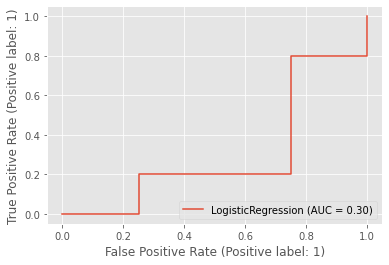

In [35]:
y_pred = LR.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(X_test, y_test)))
print('Recall of logistic regression classifier on test set: {:.2f}'.format(recall_score(y_pred, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))
plot_roc_curve(LR, X_test, y_test);

In [36]:
RF = RandomForestClassifier()

depth_parm = np.arange(1, 12, 1)
num_samples_parm = np.arange(5,95,10)
parameters = {'max_depth' : depth_parm,
             'min_samples_leaf' : num_samples_parm}

scorer = make_scorer(log_loss,
                     greater_is_better=False,
                     needs_proba=True)
clf = GridSearchCV(RF,
                   parameters,
                   cv=10,
                   scoring=scorer)
clf.fit(X_train,y_train)
print(f"log loss = {-clf.score(X_test, y_test)}")
print(f"accuracy = {(clf.predict(X_test) == y_test).mean()}")

log loss = 0.8722951297724377
accuracy = 0.2222222222222222


Fitting 3 folds for each of 324 candidates, totalling 972 fits
log loss = -0.3333333333333333
accuracy = 0.3333333333333333
[[3 5]
 [1 0]]


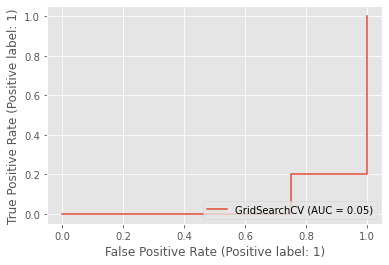

In [37]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 3, 4],
    'min_samples_leaf': np.arange(5,95,10),
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
RF = RandomForestClassifier()

grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)
print(f"log loss = {-grid_search.score(X_test, y_test)}")
print(f"accuracy = {(grid_search.predict(X_test) == y_test).mean()}")
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_pred, y_test))

plot_roc_curve(grid_search, X_test, y_test)

In [38]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(grid_search.score(X_test, y_test)))
print('Recall of logistic regression classifier on test set: {:.2f}'.format(recall_score(y_pred, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_pred, y_test)))

Accuracy of logistic regression classifier on test set: 0.33
Recall of logistic regression classifier on test set: 0.00
Precision of logistic regression classifier on test set: 0.00


In [39]:
sentimental = pd.read_csv('LoughranMcDonald_MasterDictionary_2018.csv')
sentimental

,Word,Sequence.Number,Word.Count,Word.Proportion,Average.Proportion,Std.Dev,Doc.Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
0,AARDVARK,1,277,1.480000e-08,1.240000e-08,3.560000e-06,84,0,0,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.600000e-10,9.730000e-12,9.860000e-09,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,8,4.280000e-10,1.390000e-10,6.230000e-08,7,0,0,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,12,6.410000e-10,3.160000e-10,9.380000e-08,12,0,0,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,7250,3.870000e-07,3.680000e-07,3.370000e-05,914,0,0,0,0,0,0,0,0,0,0,3,12of12inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86481,ZYGOTE,86482,46,2.460000e-09,9.690000e-10,2.060000e-07,31,0,0,0,0,0,0,0,0,0,0,2,12of12inf
86482,ZYGOTES,86483,1,5.340000e-11,2.040000e-11,2.070000e-08,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
86483,ZYGOTIC,86484,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf
86484,ZYMURGIES,86485,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf


In [40]:
sentimental.columns

Index(['Word', 'Sequence.Number', 'Word.Count', 'Word.Proportion',
       'Average.Proportion', 'Std.Dev', 'Doc.Count', 'Negative', 'Positive',
       'Uncertainty', 'Litigious', 'Constraining', 'Superfluous',
       'Interesting', 'Modal', 'Irr_Verb', 'Harvard_IV', 'Syllables',
       'Source'],
      dtype='object')

In [41]:
sentimental = sentimental[['Word', 'Negative', 'Positive', 'Uncertainty', 'Superfluous', 'Litigious']]
sentimental
d = dict()

sentimental.to_dict()
# sentimental.Word
# sentimental.Negative

{'Word': {0: 'AARDVARK',
  1: 'AARDVARKS',
  2: 'ABACI',
  3: 'ABACK',
  4: 'ABACUS',
  5: 'ABACUSES',
  6: 'ABAFT',
  7: 'ABALONE',
  8: 'ABALONES',
  9: 'ABANDON',
  10: 'ABANDONED',
  11: 'ABANDONING',
  12: 'ABANDONMENT',
  13: 'ABANDONMENTS',
  14: 'ABANDONS',
  15: 'ABASE',
  16: 'ABASED',
  17: 'ABASEMENT',
  18: 'ABASEMENTS',
  19: 'ABASES',
  20: 'ABASH',
  21: 'ABASHED',
  22: 'ABASHEDLY',
  23: 'ABASHES',
  24: 'ABASHING',
  25: 'ABASHMENT',
  26: 'ABASHMENTS',
  27: 'ABASING',
  28: 'ABATE',
  29: 'ABATED',
  30: 'ABATEMENT',
  31: 'ABATEMENTS',
  32: 'ABATES',
  33: 'ABATING',
  34: 'ABATTOIR',
  35: 'ABATTOIRS',
  36: 'ABBE',
  37: 'ABBES',
  38: 'ABBESS',
  39: 'ABBESSES',
  40: 'ABBEY',
  41: 'ABBEYS',
  42: 'ABBOT',
  43: 'ABBOTS',
  44: 'ABBREVIATE',
  45: 'ABBREVIATED',
  46: 'ABBREVIATES',
  47: 'ABBREVIATING',
  48: 'ABBREVIATION',
  49: 'ABBREVIATIONS',
  50: 'ABDICATE',
  51: 'ABDICATED',
  52: 'ABDICATES',
  53: 'ABDICATING',
  54: 'ABDICATION',
  55: 'ABDICATIO

In [42]:
d = {}
for word, neg, pos, unc, sup, lit in zip(sentimental.Word, sentimental.Negative, sentimental.Positive, sentimental.Uncertainty, sentimental.Superfluous, sentimental.Litigious):
    d[word] = [neg, pos, unc, sup, lit]
    
d

{'AARDVARK': [0, 0, 0, 0, 0],
 'AARDVARKS': [0, 0, 0, 0, 0],
 'ABACI': [0, 0, 0, 0, 0],
 'ABACK': [0, 0, 0, 0, 0],
 'ABACUS': [0, 0, 0, 0, 0],
 'ABACUSES': [0, 0, 0, 0, 0],
 'ABAFT': [0, 0, 0, 0, 0],
 'ABALONE': [0, 0, 0, 0, 0],
 'ABALONES': [0, 0, 0, 0, 0],
 'ABANDON': [2009, 0, 0, 0, 0],
 'ABANDONED': [2009, 0, 0, 0, 0],
 'ABANDONING': [2009, 0, 0, 0, 0],
 'ABANDONMENT': [2009, 0, 0, 0, 0],
 'ABANDONMENTS': [2009, 0, 0, 0, 0],
 'ABANDONS': [2009, 0, 0, 0, 0],
 'ABASE': [0, 0, 0, 0, 0],
 'ABASED': [0, 0, 0, 0, 0],
 'ABASEMENT': [0, 0, 0, 0, 0],
 'ABASEMENTS': [0, 0, 0, 0, 0],
 'ABASES': [0, 0, 0, 0, 0],
 'ABASH': [0, 0, 0, 0, 0],
 'ABASHED': [0, 0, 0, 0, 0],
 'ABASHEDLY': [0, 0, 0, 0, 0],
 'ABASHES': [0, 0, 0, 0, 0],
 'ABASHING': [0, 0, 0, 0, 0],
 'ABASHMENT': [0, 0, 0, 0, 0],
 'ABASHMENTS': [0, 0, 0, 0, 0],
 'ABASING': [0, 0, 0, 0, 0],
 'ABATE': [0, 0, 0, 0, 0],
 'ABATED': [0, 0, 0, 0, 0],
 'ABATEMENT': [0, 0, 0, 0, 0],
 'ABATEMENTS': [0, 0, 0, 0, 0],
 'ABATES': [0, 0, 0, 0, 0],
 'AB

In [43]:
scripts.transcript

0     Operator: Good morning. My name is Jacquelyn, ...
1     Operator: Good morning. My name is Hyde, and I...
2     Operator: Good day. My name is Elsa, and I wil...
3     Operator: Good day. My name is Karnesia, and I...
4     Operator: Good morning, Ladies and gentlemen. ...
5     Operator: Good morning. My name is Tom, and I ...
6     Operator: Ladies and gentlemen, thank you for ...
7     Operator: Ladies and gentlemen, thank you for ...
8     Operator: Good day, ladies and gentlemen, and ...
9     Operator: Good day, ladies and gentlemen, and ...
10    Operator: Good day, ladies and gentlemen, and ...
11    Operator: Good day, ladies and gentlemen, and ...
12    Operator: Good day, ladies and gentlemen. And ...
13    Operator: Good day, ladies and gentlemen, and ...
14    Operator: Good day, ladies and gentlemen, and ...
15    Operator: Good day, ladies and gentlemen, and ...
16    Operator: Good afternoon, ladies and gentlemen...
17    Operator: Good afternoon ladies and gentle

In [44]:
def LMdict(series,dictionary):
    positive_list = []
    negative_list = []
    uncertainty_list = []
    superfluous_list = []
    litigious_list = []
    tokenizer = RegexpTokenizer(r'\w+')
    for transcript in series:
        
        positive = 0
        negative = 0
        uncertainty = 0
        superfluous = 0
        litigious = 0
        punc_be_gone = tokenizer.tokenize(transcript.upper())
    
        for word in punc_be_gone:
            if word in dictionary.keys():
                negative += dictionary[word][0]
                positive += dictionary[word][1]
                uncertainty += dictionary[word][2]
                superfluous += dictionary[word][3]
                litigious += dictionary[word][4]
            else:
                continue
        positive_list.append(positive)
        negative_list.append(negative)
        uncertainty_list.append(uncertainty)
        superfluous_list.append(superfluous)
        litigious_list.append(litigious)

    return [positive_list, negative_list, uncertainty_list, superfluous_list, litigious_list]

In [46]:
LM_analysis = LMdict(scripts.dropna().transcript, d)
LM_analysis

[[116525,
  100459,
  178807,
  144648,
  156708,
  223011,
  86387,
  176804,
  283272,
  196885,
  132594,
  118534,
  196888,
  218990,
  227020,
  208939,
  305374,
  327467,
  341545,
  231038,
  227029,
  359626,
  251143,
  265212,
  305416,
  265206,
  174783,
  108492,
  162735,
  208936,
  162738,
  146657,
  126573],
 [50225,
  62279,
  72324,
  48216,
  62279,
  64288,
  48216,
  92414,
  76342,
  62279,
  104468,
  84378,
  160720,
  118531,
  54243,
  60270,
  78351,
  96432,
  90405,
  44198,
  58261,
  112504,
  82369,
  116522,
  116522,
  106477,
  130585,
  122549,
  114513,
  94423,
  118531,
  84378,
  120540],
 [56252,
  76342,
  74333,
  58261,
  50225,
  48216,
  32144,
  76342,
  158711,
  84378,
  98441,
  104468,
  164738,
  128576,
  74333,
  48216,
  86387,
  114513,
  92414,
  96432,
  70315,
  98441,
  116522,
  126567,
  86387,
  76342,
  102459,
  90405,
  92414,
  88396,
  102459,
  74333,
  96432],
 [0,
  4018,
  0,
  2009,
  0,
  0,
  0,
  0,
  0,
  

In [47]:
len(LM_analysis[0])

33

In [48]:
X

,GunningFog,FleschKincaidGrade,LexiconCount,SmogIndex,ability,able,accelerate,accounting,accounts,achieve,...,within,wondering,work,working,world,worldwide,x,yet,sample,vgt
0,9.47,69.31,3880,10.6,0.025949,0.000000,0.009615,0.000000,0.009114,0.019763,...,0.014505,0.000000,0.006575,0.006904,0.031308,0.011416,0.000000,0.009881,-0.017695,0.034046
1,11.41,64.54,3972,11.7,0.030538,0.008535,0.000000,0.000000,0.000000,0.011629,...,0.008535,0.000000,0.015475,0.016251,0.066321,0.013435,0.000000,0.000000,0.057068,0.076972
2,9.11,70.33,4913,11.0,0.029982,0.025138,0.000000,0.042128,0.000000,0.017126,...,0.025138,0.000000,0.005697,0.005983,0.021704,0.019786,0.000000,0.008563,0.099458,0.092351
3,8.97,70.84,4961,10.9,0.000000,0.036205,0.000000,0.060674,0.000000,0.019732,...,0.021723,0.000000,0.013129,0.006894,0.018756,0.011398,0.000000,0.009866,0.151056,-0.011487
4,9.32,62.07,4641,11.4,0.021137,0.017723,0.015664,0.000000,0.014847,0.000000,...,0.017723,0.000000,0.010711,0.011248,0.005100,0.009299,0.000000,0.000000,-0.112634,-0.019001
5,9.30,61.87,5497,11.4,0.011452,0.019204,0.019094,0.000000,0.012066,0.006541,...,0.019204,0.012391,0.004352,0.018282,0.020725,0.007557,0.000000,0.000000,0.194648,0.060012
6,9.77,61.56,2641,11.6,0.000000,0.021830,0.014471,0.000000,0.000000,0.000000,...,0.000000,0.014086,0.000000,0.000000,0.018848,0.017182,0.000000,0.000000,0.096678,0.114114
7,8.91,62.78,5498,11.2,0.000000,0.011820,0.007835,0.000000,0.000000,0.000000,...,0.000000,0.007627,0.037505,0.022506,0.020411,0.000000,0.000000,0.008052,0.116901,0.127942
8,7.15,73.88,7156,9.8,0.000000,0.011304,0.000000,0.012629,0.018940,0.005134,...,0.007536,0.000000,0.000000,0.007175,0.009760,0.000000,0.000000,0.015402,-0.058559,0.034046
9,7.92,65.01,4724,10.6,0.006380,0.000000,0.000000,0.026892,0.006722,0.007288,...,0.005349,0.000000,0.009698,0.025462,0.004618,0.000000,0.000000,0.000000,-0.027356,0.013747


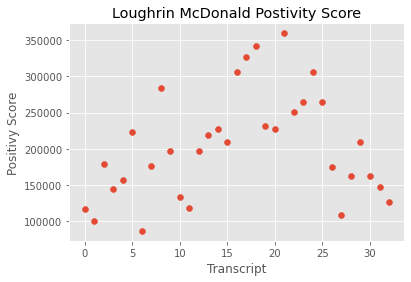

In [49]:
fig, axs = plt.subplots()

axs.scatter(range(len(LM_analysis[0])), LM_analysis[0])
axs.set_ylabel('Positivy Score')
axs.set_xlabel('Transcript')
axs.set_title('Loughrin McDonald Postivity Score');

Scripts:  37
Loughran_McDonald:  33


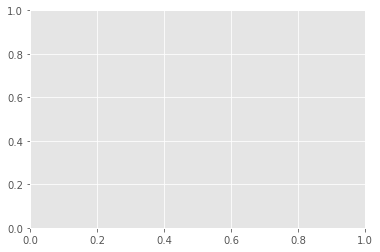

In [53]:
fig, axs = plt.subplots()

print('Scripts: ', len(scripts['sample'].dropna()))
print('Loughran_McDonald: ', len(LM_analysis[0]))

#axs.scatter(LM_analysis[0], scripts['ticker_data'].dropna())
#axs.set_ylabel('Ticker Growth')
#axs.set_xlabel('Positivy Score')
#axs.set_title('Loughrin McDonald Postivity Score');